## 데이터 확인하기 위한 파일 
### https://kaggle-kr.tistory.com/17

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')    # matplotlib의 기본 scheme 말고 seaborn schene를 세팅
sns.set(font_scale=2.5)     # 한 번에 크기 지정

import missingno as msno    # 결측치 시각화 라이브러리
# 경고 무시
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  # 노트북에서 바로 볼 수 있도록 함

In [11]:
# 데이터 지정
df_train = pd.read_csv('D:/kaggle/train.csv')
df_test = pd.read_csv('D:/kaggle/test.csv')

In [12]:
# 헤드 확인
df_train.head()

# passengerId 에 따른 feature들로 Survived를 맞춰야 함

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [ ]:
# feature 정리 및 확인

# PassengerId: 승객번호 train의 경우 0~99999까지 100000개가 있음
# Survived: 생존 여부 0 = No, 1 = Yes
# pclass: 티켓 클래스 1 = 1st, 2 = 2nd, 3 = 3rd (categorical feature)
# sex: 성별 male, female
# Age: 나이 
# SibSp: 함께 탑승한 형제와 배우자의 수
# Parch: 함께 탑승한 부모, 아이의 수
# Ticket: 티켓 번호 alphabat + integer
# Fare: 탑승료
# Cabin: 객실 번호
# Embarked: 탑승 항구  C = Cherbourg, Q = Queenstown, S = Southampton

# describe로 각 특성의 통계치 반환
df_train.describe()
# count 값이 passengerId개수인 십만개와 다르다면 null값임

In [ ]:
df_test.describe()
# count 값이 passengerId개수인 십만개와 다르다면 null값임

### Null data check

In [15]:
# null값이 있으니 시각화 해서 보자
for col in df_train.columns:
    msg = 'column: {:>12}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column:  PassengerId	 Percent of NaN value: 0.00%
column:     Survived	 Percent of NaN value: 0.00%
column:       Pclass	 Percent of NaN value: 0.00%
column:         Name	 Percent of NaN value: 0.00%
column:          Sex	 Percent of NaN value: 0.00%
column:          Age	 Percent of NaN value: 3.29%
column:        SibSp	 Percent of NaN value: 0.00%
column:        Parch	 Percent of NaN value: 0.00%
column:       Ticket	 Percent of NaN value: 4.62%
column:         Fare	 Percent of NaN value: 0.13%
column:        Cabin	 Percent of NaN value: 67.87%
column:     Embarked	 Percent of NaN value: 0.25%


In [16]:
for col in df_test.columns:
    msg = 'column: {:>12}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column:  PassengerId	 Percent of NaN value: 0.00%
column:       Pclass	 Percent of NaN value: 0.00%
column:         Name	 Percent of NaN value: 0.00%
column:          Sex	 Percent of NaN value: 0.00%
column:          Age	 Percent of NaN value: 3.49%
column:        SibSp	 Percent of NaN value: 0.00%
column:        Parch	 Percent of NaN value: 0.00%
column:       Ticket	 Percent of NaN value: 5.18%
column:         Fare	 Percent of NaN value: 0.13%
column:        Cabin	 Percent of NaN value: 70.83%
column:     Embarked	 Percent of NaN value: 0.28%


<AxesSubplot:>

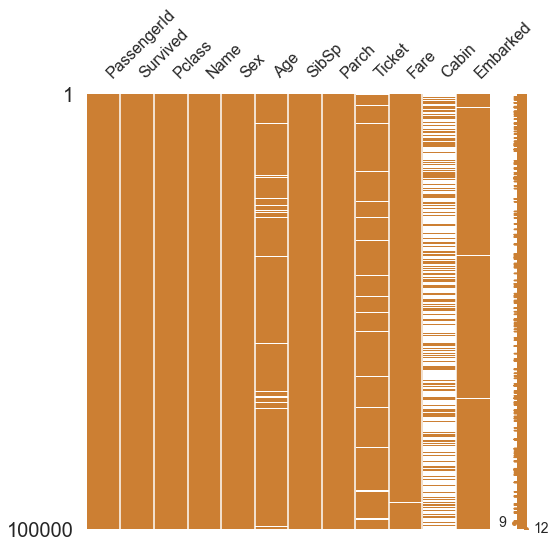

In [17]:
# 처음에 불러온 import missingno as msno 로 결측치를 시각화해서 더 쉽게 보자 
# matrix로
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

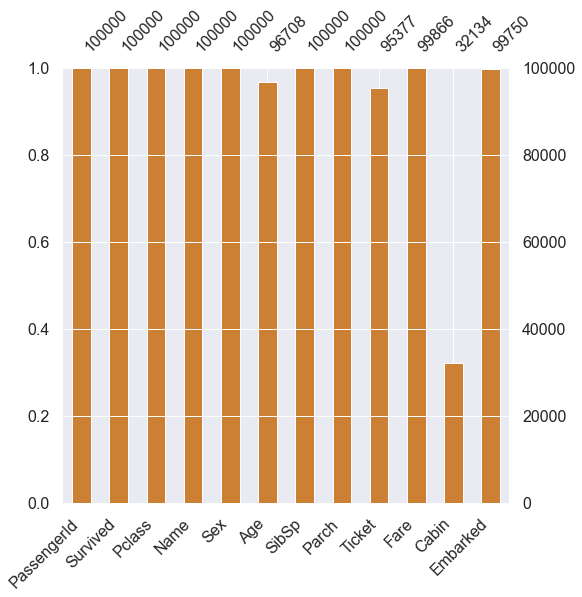

In [18]:
# bar로
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

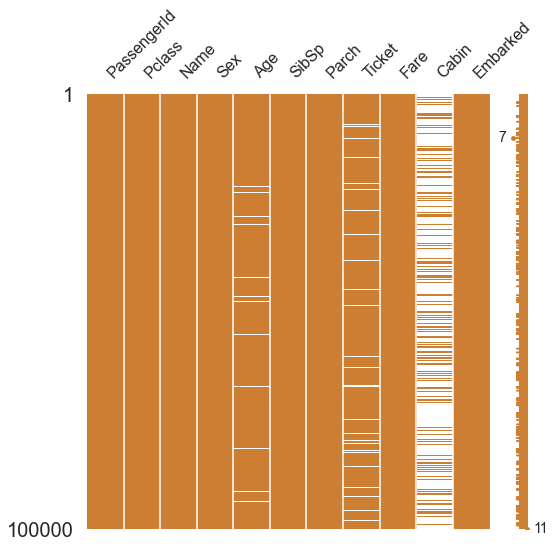

In [19]:
# test도 matrix로 확인
msno.matrix(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

### Target label 확인
target label이 어떤 분포를 갖고 있는지 확인, binary(0 or 1)의 경우 어떤 분표냐에 따라 모델의 평가 방법이 달라 질 수 있다.

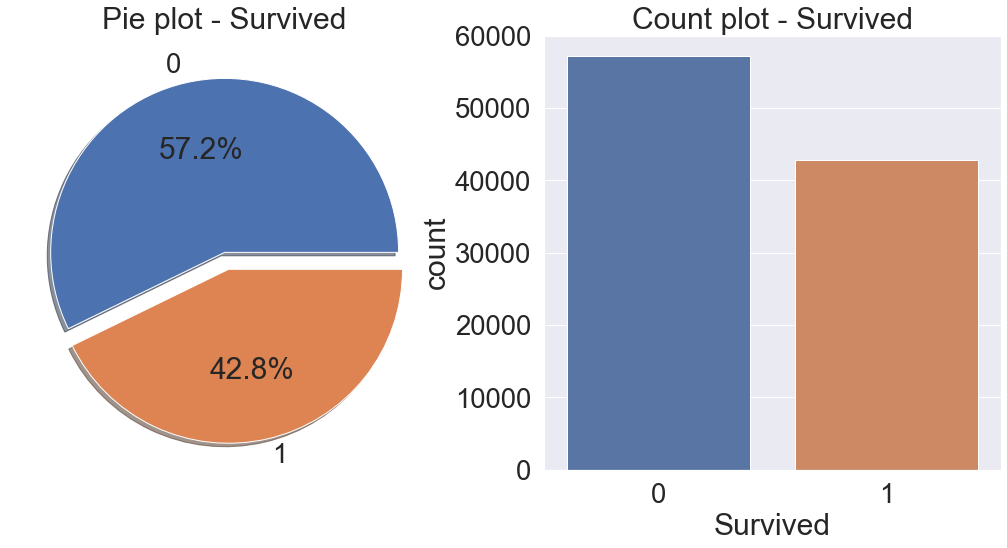

In [20]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 제법 균일한 모양~ 계속 진행!

## Exploratory data analysis
본격적인 데이터 분석
분석을 위한 시각화로는 matplotlib, seaborn, plotly 등을 쓰도록 함

PassengerId: 승객번호 train의 경우 0~99999까지 100000개가 있음

Survived: 생존 여부 0 = No, 1 = Yes

pclass: 티켓 클래스 1 = 1st, 2 = 2nd, 3 = 3rd (categorical feature)

sex: 성별 male, female

Age: 나이 

SibSp: 함께 탑승한 형제와 배우자의 수

Parch: 함께 탑승한 부모, 아이의 수

Ticket: 티켓 번호 alphabat + integer

Fare: 탑승료

Cabin: 객실 번호

Embarked: 탑승 항구  C = Cherbourg, Q = Queenstown, S = Southampton

## 1. pclass: 티켓 클래스 1 = 1st, 2 = 2nd, 3 = 3rd (categorical feature)


In [21]:
# .count()를 이용해서 pclass안의 survived가 총 몇인지 확인 (모두 합하면 십만이 나옴)
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,30315
2,28679
3,41006


In [22]:
# .sum() 을 이용해 0, 1 모두 더한 것, 결과적으로 1만 더해져서 생존자 수만 나옴
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,17576
2,15057
3,10141


In [23]:
# 이 과정을 crosstab으로 더 수월하게 볼 수 있음
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

# margins=True 총 합까지 보여줌

Survived,0,1,All
Pclass,,,
1,12739,17576,30315
2,13622,15057,28679
3,30865,10141,41006
All,57226,42774,100000


,Survived
Pclass,
1,57.977899
2,52.501831
3,24.730527


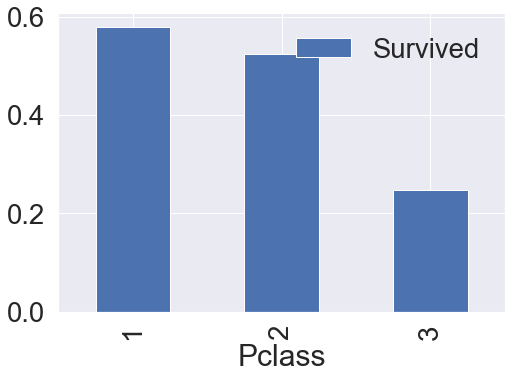

In [24]:
# grouped 객체에 .mead()을 이용해 각 클래스별 생존률을 얻어보자
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

# pclass가 높을 수록(1st) 생존률이 높은 것을 확인 가능

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()*100

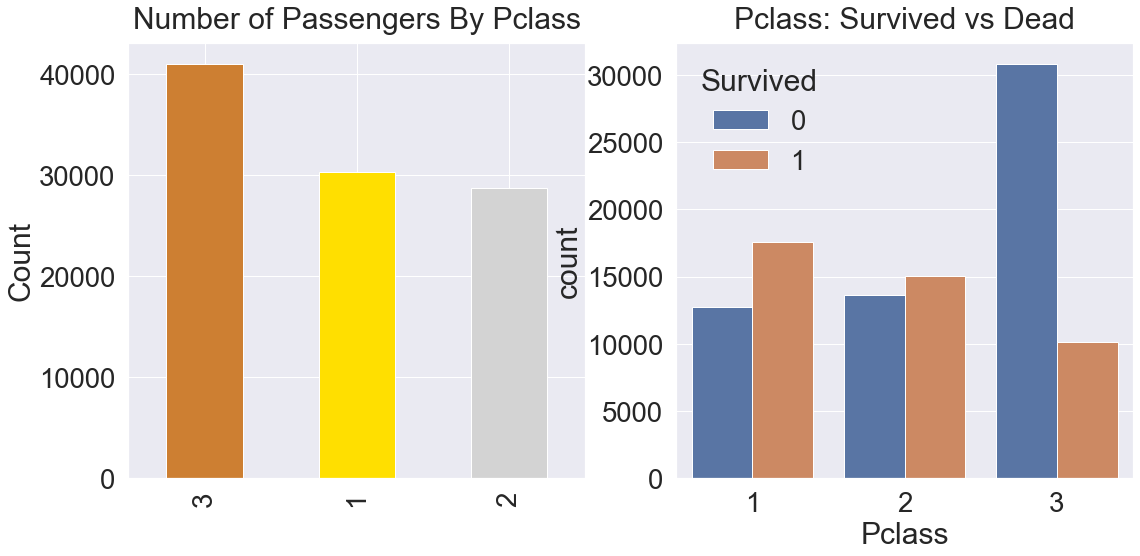

In [25]:
# seaborn과 countplot으로 더 자세한 표를 그려보자

y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

# 결론적으로 pclass가 생존에 큰 영향을 미쳤다고 판단 가능

## 2. sex

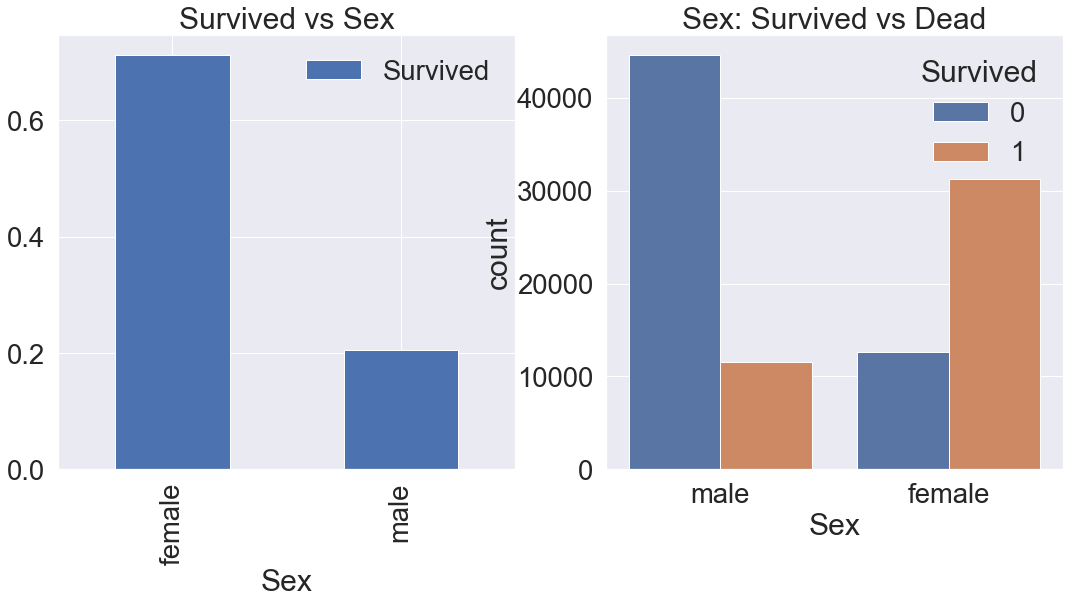

In [26]:
# 성별별 생존률을 살펴보자

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [27]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)*100

,Survived
Sex,
female,71.152532
male,20.579535


In [28]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

# 결론적으로 여성일 때 생존할 확률이 더 높음

Survived,0,1,All
Sex,,,
female,12660,31226,43886
male,44566,11548,56114
All,57226,42774,100000


## 3. Both Sex and Pclass

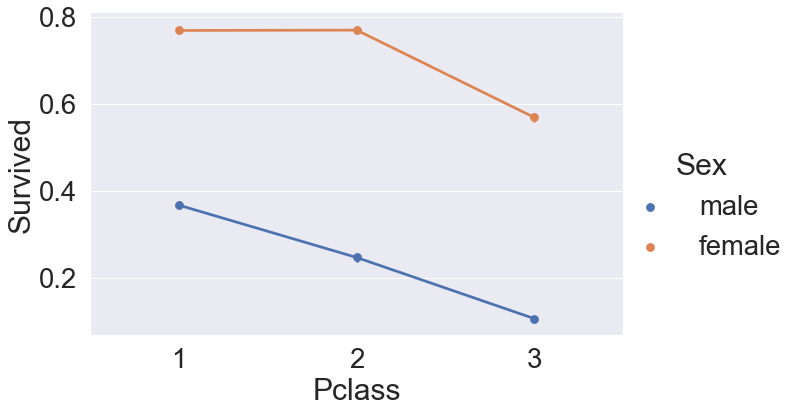

In [29]:
# 성별과 클래스에 관하여 생존이 어떻게 달라지는 지 확인해보자

sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

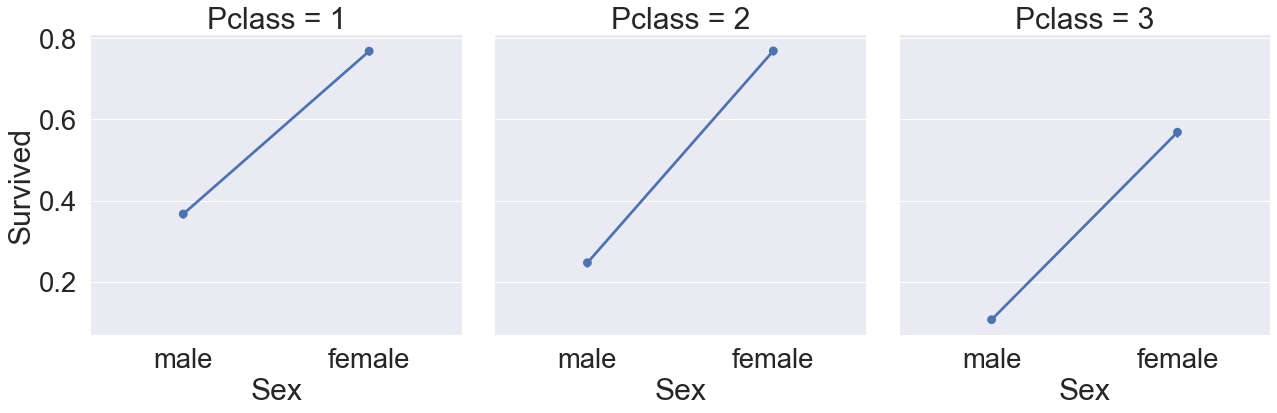

In [30]:
sns.factorplot(x = 'Sex', y = 'Survived', col='Pclass', data=df_train, satureation=.5, size=6, aspect=1)

# 모든 클래스에서 여성이 남성보다 생존률이 높다.
# 성별에 상관 없이 클래스가 높을 수록 살 확률이 높다.

## 4. Age

In [31]:
# 나이에 따른 생존률 확인

print('제일 나이 많은 탑습객 : {:.1f} 살'.format(df_train['Age'].max()))
print('제일 어린 탑습객 {:.1f} 살'.format(df_train['Age'].min()))
print('탑승객 평균 나이 {:.1f} 살'.format(df_train['Age'].mean()))

제일 나이 많은 탑습객 : 87.0 살
제일 어린 탑습객 0.1 살
탑승객 평균 나이 38.4 살


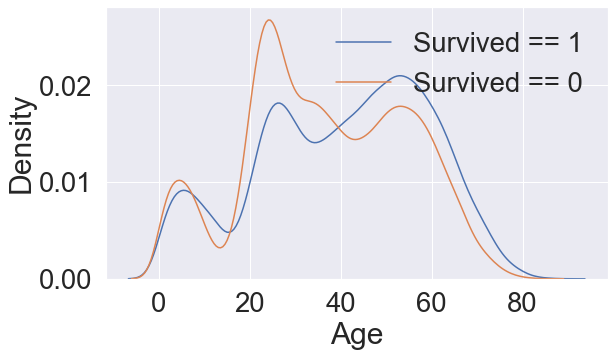

In [32]:
# 생존에 따른 age histogram을 그려보자

fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

# Kernel Density Estimation(커널 밀도 추정) = kde
# 어릴 수록 많이 죽고 40~부터 많이 살아남음

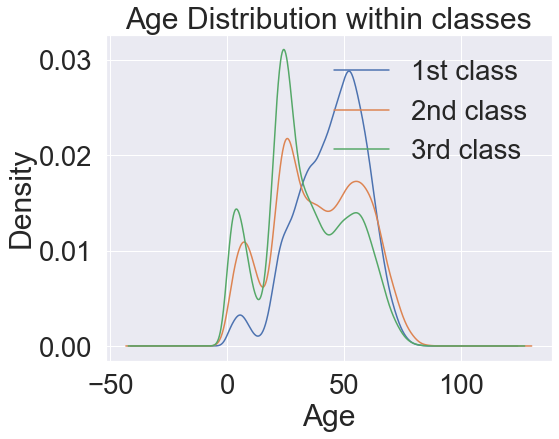

In [33]:
# 클래스에 따른 나이 분포 확인
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

# 높은 클래스일 수록 나이든 사람 비중이 커짐

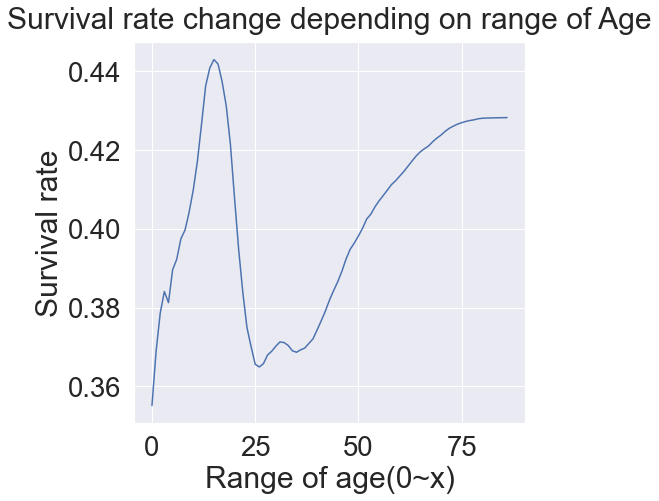

In [34]:
# 나이대에 따른 생존률 확인
cummulate_survival_ratio = []
for i in range(1, 88):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
# 각 나이별로 생존(0,1) 더한 것을 총 값으로 나눠줌

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of age(0~x)')
plt.show()

# 청소년과 노인의 생존률이 높다
# 중요한 feature로 사용

## 5. Pclass, Sex, Age

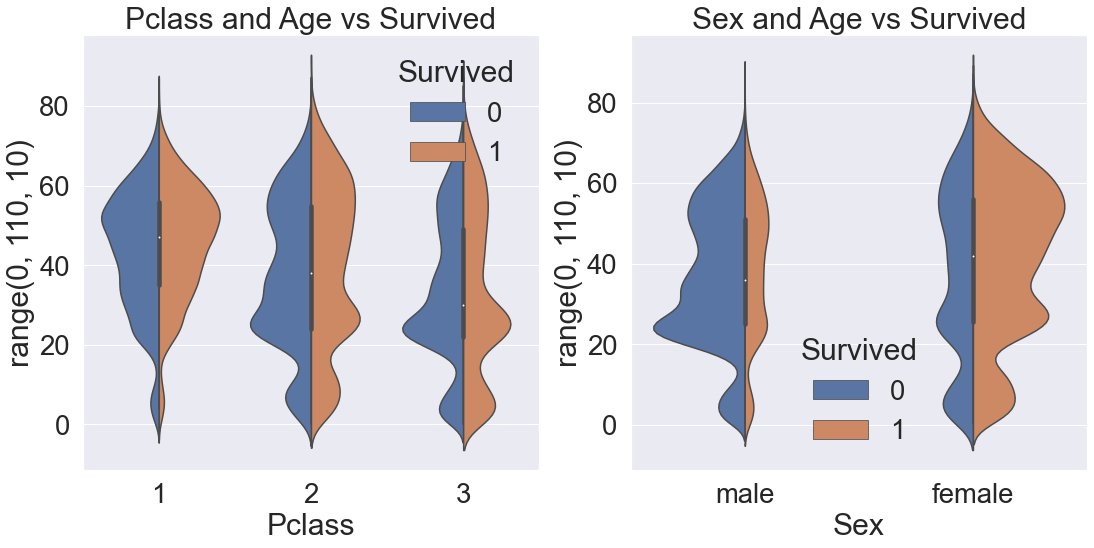

In [35]:
# 클래스, 성별, 나이에 대해 한번에 확인해보자
# violinplot을 사용해보자

f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, sclae='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_ylabel(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_ylabel(range(0, 110, 10))
plt.show()

# 여성노인과 어린이의 생존률이 높다.

## 6. Embarked
탑승했던 항구와 생존률의 상관관계 확인

,Survived
Embarked,
S,31.529409
Q,59.697640
C,75.129580


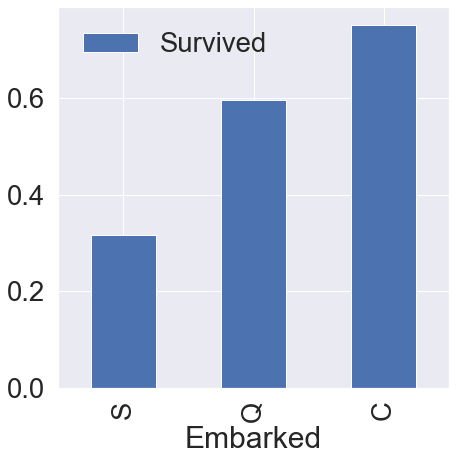

In [36]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=True).plot.bar(ax=ax)

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=True)*100

# 항구별 생존률 차이 확인

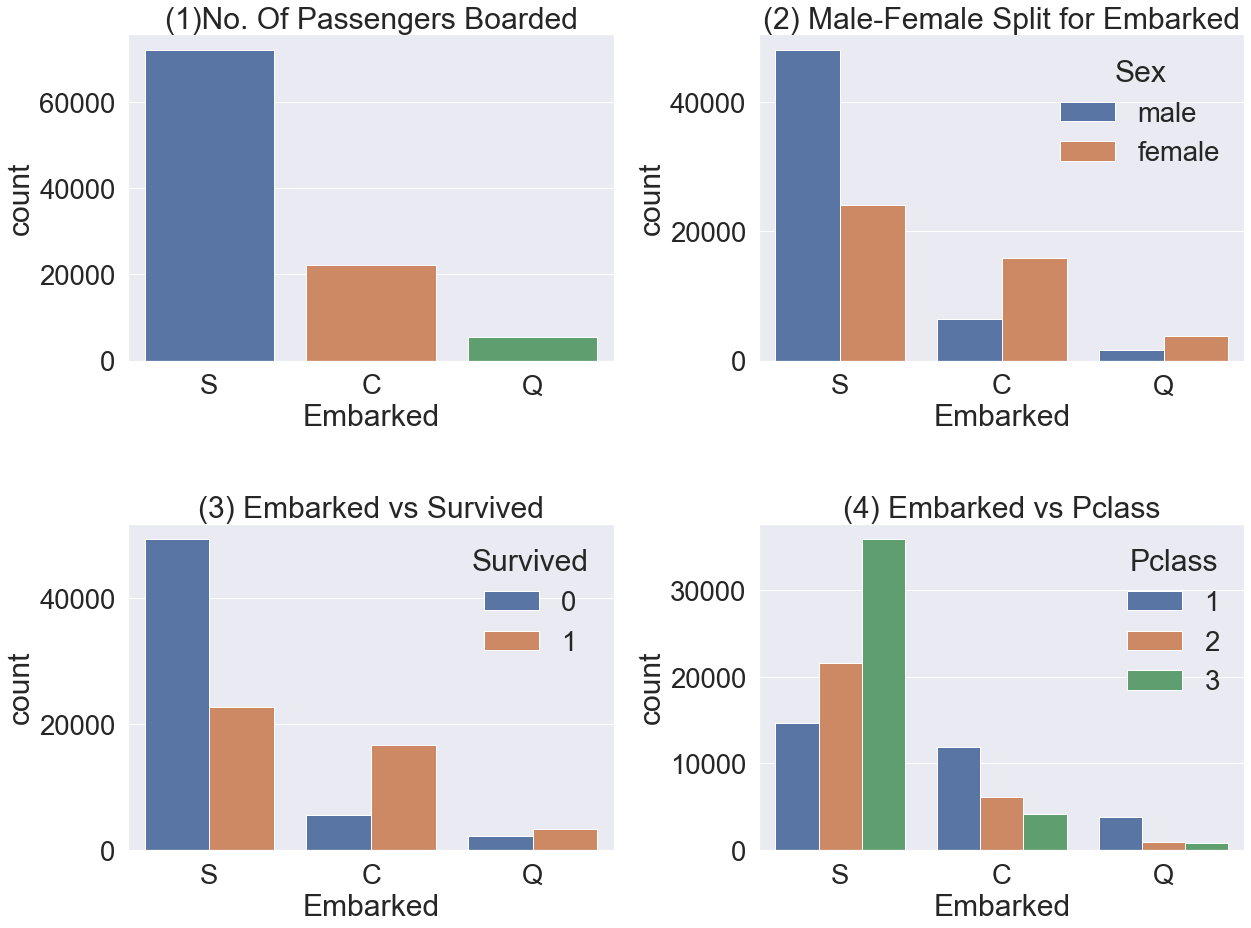

In [37]:
# 더 자세하게 살펴보자
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1)No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived',data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass',data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.3, hspace=0.5)     # 그래프 사이 간격 조정
plt.show()

# S 항구에서 가장 많은 사람이 탑승
# S 에는 남성이 더 많이 탑승
# S의 탑승객이 가장 많이 사망
# S에 class 3 가 많아 생존률이 더 낮음, 생존률이 가장 높은 C에 class 1 의 비율이 가장 높음

## 7. Family - SibSp(형제 자매) + Parch(부모, 자녀)
SibSp + Parch 하면 Family 가 되는데 생존률과 비교해보자

In [38]:
# family size 확인

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1  # 자신을 포함해야 하니 +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
print('train / Maximum size of Family: ', df_train['FamilySize'].max())
print('test  / Maximum size of Family: ', df_test['FamilySize'].max())

train / Maximum size of Family:  18
test  / Maximum size of Family:  18


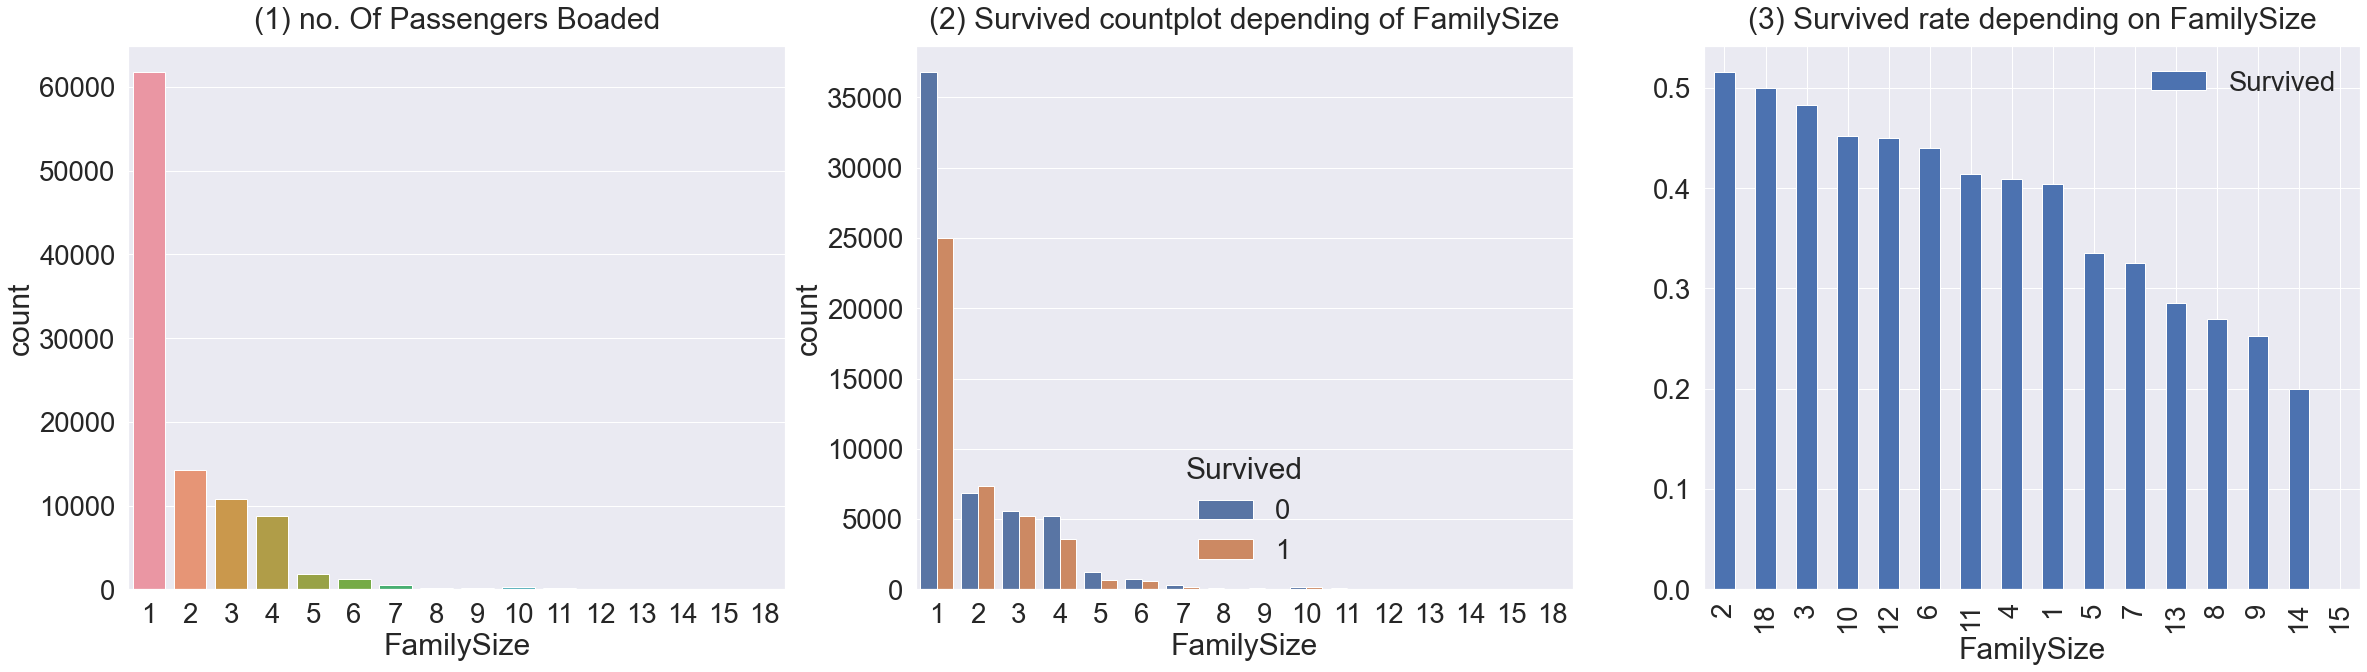

In [39]:
# family size 와 생존률 관계 보기
f, ax = plt.subplots(1, 3, figsize=(40, 10))

# 가족 크기별 그룹수
sns.countplot('FamilySize', data = df_train, ax=ax[0])
ax[0].set_title('(1) no. Of Passengers Boaded', y=1.02)
# 가족 크기에 따른 생존 비교
sns.countplot('FamilySize', hue = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending of FamilySize', y=1.02)
# 가족 크기에 따른 생존률
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 혼자 온 승객이 가장 많았음
# 2명일 때 살아남을 확률이 가장 높음

## 8. Fare
탑승요금

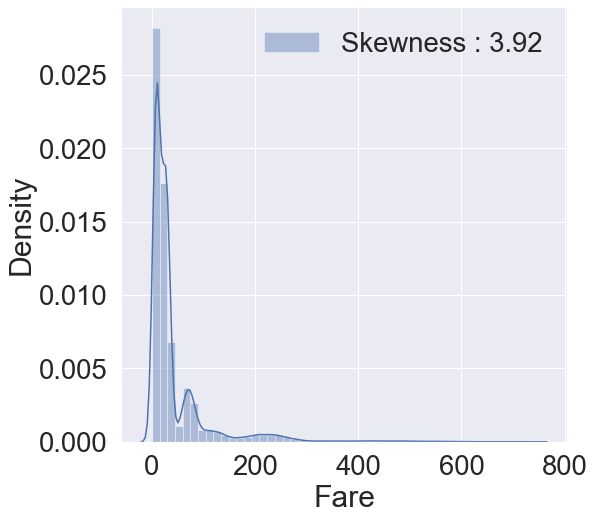

In [40]:
# Fare의 histogram 그리기
# Skewness 비틀어짐 뒤틀림
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# 0~744까지 범위가 너무 큰데 대부분 100미만에 몰려있음
# distribution이 매우 비대칭
# log를 하여 outlier(이상치)의 영향을 줄여야함 > lambda 함수를 이용해 Fare column에 로그를 적용하자

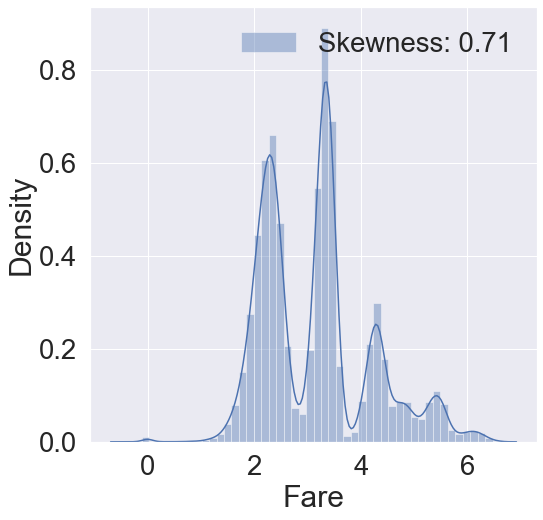

In [41]:
# test에 있는 null 값을 평균값으로 치환
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

# log를 하여 outlier(이상치)의 영향을 줄여야함 > lambda 함수를 이용해 Fare column에 로그를 적용하자
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

f, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# log를 취하고 비대칭성 많이 사라진 것 확인

In [ ]:
# 요금에 따른 생존률
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Fare', 'Survived']].groupby(['Fare'], as_index=True).mean().sort_values(by='Survived', ascending=True).plot.bar(ax=ax)
plt.show()

print(df_train[['Fare', 'Survived']].groupby(['Fare'], as_index=True).mean().sort_values(by='Survived', ascending=True)*100)

# 값이 계속 안 나오는데 다음에 확인

## 9. cabin
이 특성은 null 값이 너무 많아 데이터셋에서 제외할 것임

In [42]:
df_train['Cabin'].isnull().sum()

67866

## 10. Ticker
Ticket: 티켓 번호 alphabat + integer의 string data

In [43]:
print(df_train['Ticket'].value_counts())
print('\n')
print('null 값 개수: ', df_train['Ticket'].isnull().sum())
print('\n')
print('unigue 값 개수: ', len(df_train['Ticket'].unique()))

A/5            602
C.A.           177
SC/PARIS       145
SOTON/O.Q.      80
SC              57
              ... 
33508            1
404986           1
13137            1
426414           1
501372           1
Name: Ticket, Length: 75331, dtype: int64


null 값 개수:  4623


unigue 값 개수:  75332
